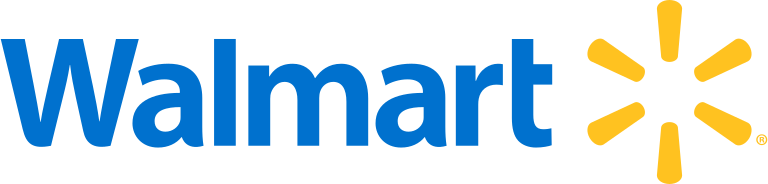**<font color='207AD5'>Business Case by Lohith Kasula</font>**

**Defining Problem Statement and Analyzing basic metrics**

**Problem Statement:**
The Management team in the company Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the
customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits
differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50
million are female).

**Importing all required Python Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
import scipy.stats as stats
import math

**Loading the Walmart Dataset**

In [ ]:
df = pd.read_csv('walmart_data.csv')
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0


**Checking Structure and Characteristics of Data**

In [ ]:
df.columns.values

array(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category', 'Purchase'], dtype=object)

In [ ]:
df.index.values

array([     0,      1,      2, ..., 100172, 100173, 100174])

In [ ]:
df.shape

(100175, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100175 entries, 0 to 100174
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     100175 non-null  int64  
 1   Product_ID                  100175 non-null  object 
 2   Gender                      100174 non-null  object 
 3   Age                         100174 non-null  object 
 4   Occupation                  100174 non-null  float64
 5   City_Category               100174 non-null  object 
 6   Stay_In_Current_City_Years  100174 non-null  object 
 7   Marital_Status              100174 non-null  float64
 8   Product_Category            100174 non-null  float64
 9   Purchase                    100174 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 7.6+ MB


In [ ]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,1.001750e+05,100175,100174,100174,100174.000000,100174,100174,100174.000000,100174.000000,100174.000000
unique,NaN,3320,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00025442,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,305,75659,39602,NaN,42026,34949,NaN,NaN,NaN
mean,1.002741e+06,NaN,NaN,NaN,8.090263,NaN,NaN,0.408479,5.300747,9297.731188
std,1.683034e+03,NaN,NaN,NaN,6.528787,NaN,NaN,0.491555,3.734282,4966.078540
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,185.000000
25%,1.001301e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5862.000000
50%,1.002621e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8051.000000
75%,1.004054e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12043.000000


**Observation:**

**<font color='736C06'> 1. Top Purchased gender is male </font>**

**<font color='736C06'> 2. Top Purchased people are from the age group of 26 to 35 </font>**

**<font color='736C06'> 3. The Average purchase is 9263.96, Minimum and Maximum puchases are 12.00 and 23961.00 respectively, so we can't use mean as the central tendency for our anlysis.</font>**

**<font color='736C06'> 4. We can observe that median of purchase is 8047.00</font>**


In [ ]:
df.size

1001750

In [ ]:
df.empty

False

**Converting numerical datatype to categorical datatype Changing the datatype of Occupation, Marital_Status & Product_Category**

In [ ]:
columns = ['Occupation', 'Marital_Status', 'Product_Category']

df[columns] = df[columns].astype('object')
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                     object
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                 object
Product_Category               object
Purchase                      float64
dtype: object

**Non Graphical Analysis value counts and unique attributes**

In [ ]:
df['Gender'].value_counts()

Gender
M    75659
F    24515
Name: count, dtype: int64

**<font color='736C06'>From above, It is clear that Males purchase count is more compared to the female</font>**


In [ ]:
(df['Gender'].value_counts()/len(df.index))*100

Gender
M    75.526828
F    24.472174
Name: count, dtype: float64

**Percentages based on gender**

**<font color='736C06'> From above, we can say say that Male purchase is 75.31 and female purchase is 24.68 </font>**

In [ ]:
df['Age'].value_counts()

Age
26-35    39602
36-45    19947
18-25    18860
46-50     7965
51-55     7065
55+       3931
0-17      2804
Name: count, dtype: int64

**<font color='736C06'> We can conclude that more purchases are done by the people of age group 26-35, we few purchases are done by people under age of 18 </fort>**

In [ ]:
(df['Age'].value_counts()/len(df))*100

Age
26-35    39.532818
36-45    19.912154
18-25    18.827053
46-50     7.951086
51-55     7.052658
55+       3.924133
0-17      2.799102
Name: count, dtype: float64

**<font color='736C06'> 39.53% of the people are of the age group 26-35, they most purchased cutomers compared to other age group</font>**  

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     34949
2     18598
3     17532
4+    15539
0     13556
Name: count, dtype: int64

**<font color='736C06'>Most of the purchases are from city 1 i.e 34949</font>**

In [ ]:
(df['Stay_In_Current_City_Years'].value_counts()/len(df))*100

Stay_In_Current_City_Years
1     34.887946
2     18.565510
3     17.501373
4+    15.511854
0     13.532318
Name: count, dtype: float64

**<font color='736C06'>City 1 purchase proportion is more i.e 34.88% and city 0 has least percent of 13.53%**</font>

In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
0.0    59255
1.0    40919
Name: count, dtype: int64

**<font color='736C06'>59255 people  are singles and 40919 people are married, purchases of singles are more compared to married**</font>

In [ ]:
(df['Marital_Status'].value_counts()/len(df))*100

Marital_Status
0.0    59.151485
1.0    40.847517
Name: count, dtype: float64

**<font color='736C06'>Around 59.15% peple are singles and 40.84% people are married</font>**

**Unique Attributes**

In [ ]:
print("No. of Unique Products    :", df['Product_Category'].nunique())
print("No. of Unique Cities      :", df['City_Category'].nunique())
print("No. of Unique Product IDs :", df['Product_ID'].nunique())
print("No. of Unique User IDs    :", df['User_ID'].nunique())

No. of Unique Products    : 18
No. of Unique Cities      : 3
No. of Unique Product IDs : 3320
No. of Unique User IDs    : 5798


**From the aove we can get the following information**

**<font color='736C06'>No. of Unique Products    : 18</font>**

**<font color='736C06'>No. of Unique Cities      : 3</font>**

**<font color='736C06'>No. of Unique Product IDs : 3320</font>**

**<font color='736C06'>No. of Unique User IDs    : 5798</font>**

**Visulal anlysis univariate and Bivariate**

**Univariate**

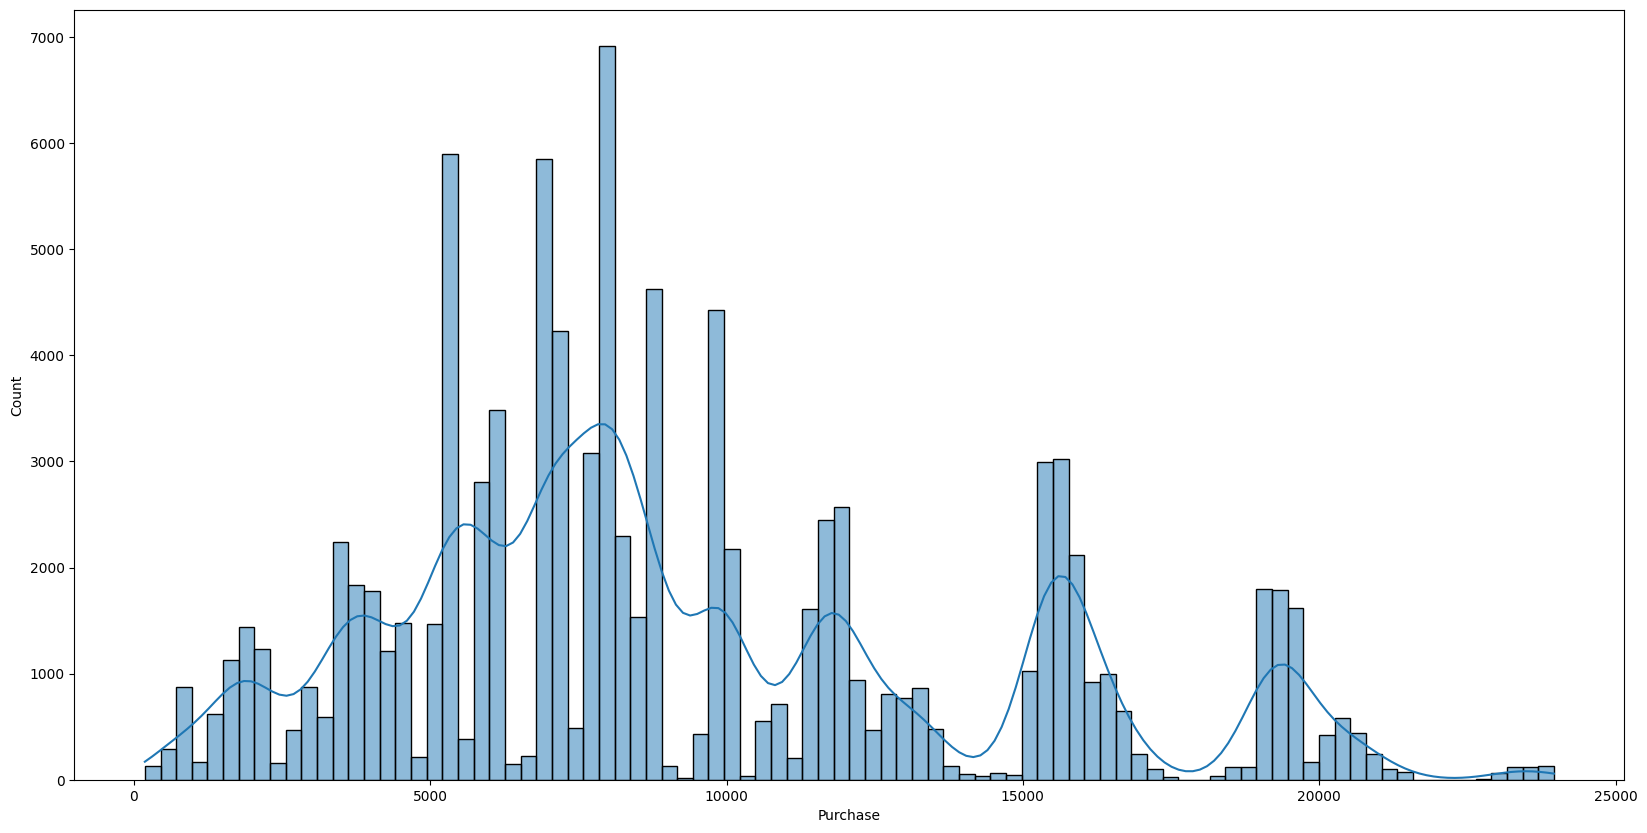

In [ ]:
plt.figure(figsize=(20,10))

sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

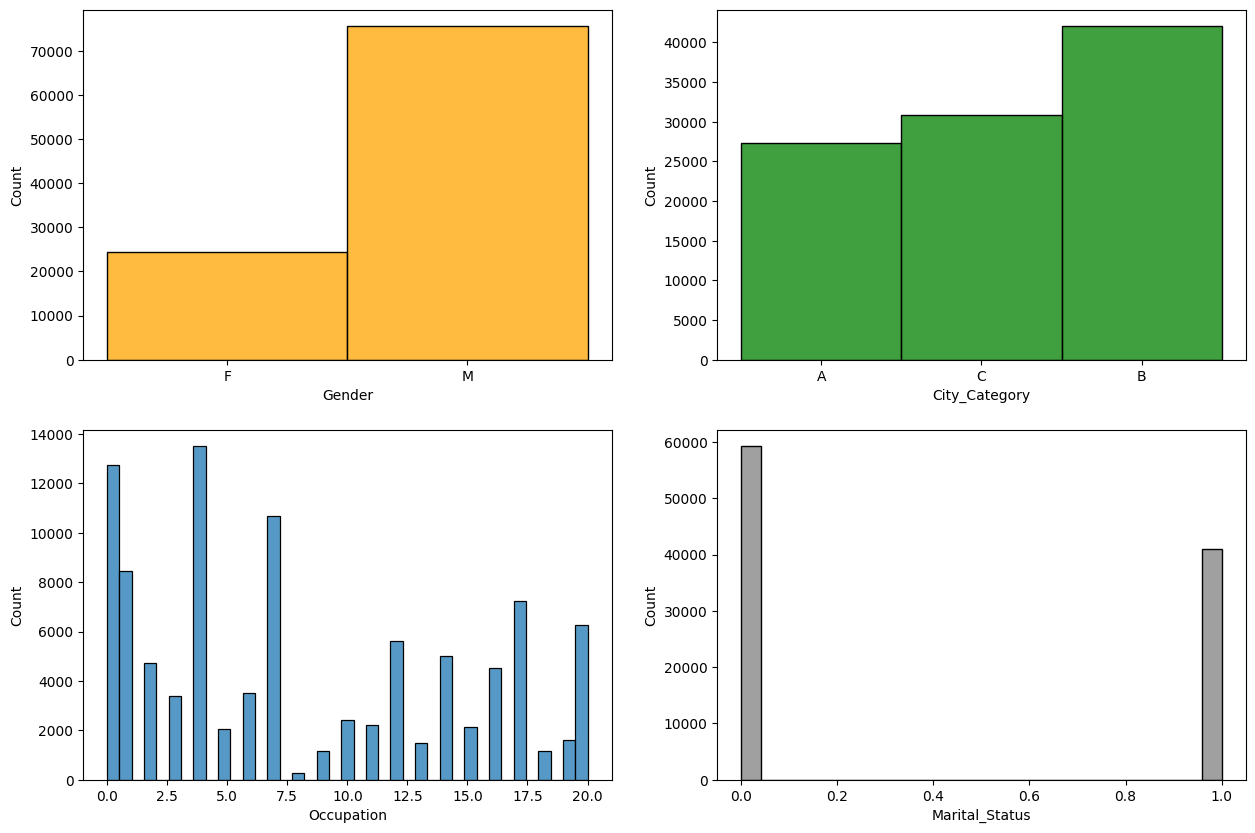

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.histplot(data=df, x='Gender', ax=axis[0,0],color = "orange")
sns.histplot(data=df, x='City_Category', ax=axis[0,1],color = "green")
sns.histplot(data=df, x='Occupation', ax=axis[1,0])
sns.histplot(data=df, x='Marital_Status',ax=axis[1,1],color = "grey")
plt.show()

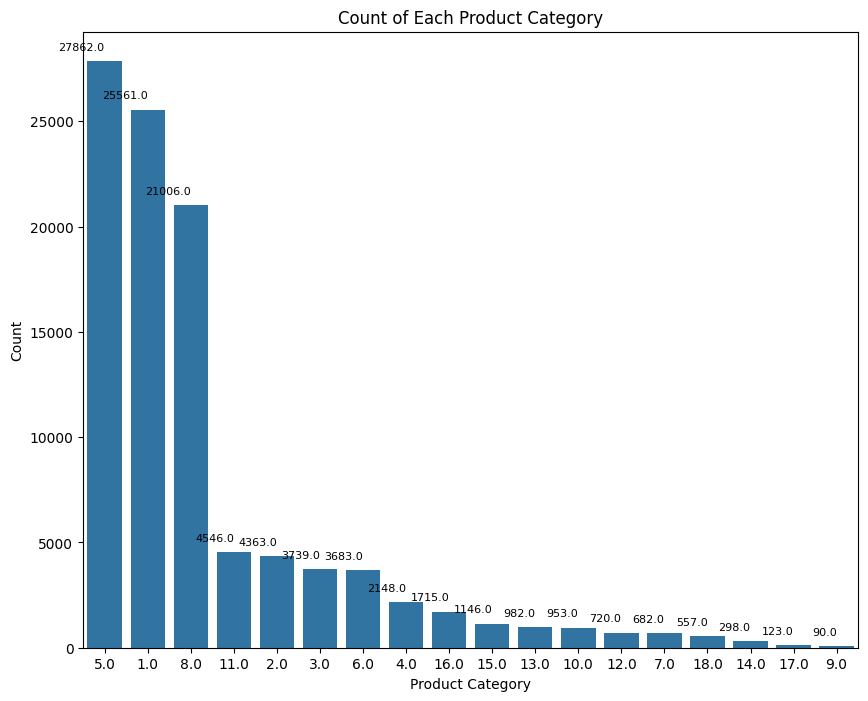

In [ ]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Each Product Category')
for p in plt.gca().patches:
  plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
  ha='right', va='center', fontsize=8, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

# Insights:
**<font color='736C06'>1) The product categories 5, 1, and 8 have the highest purchase.</font>**

**<font color='736C06'>2) Males are purchasing more compared to female.**</font>

**<font color='736C06'>3) More users belong to city B</font>**

**<font color='736C06'>4) Most of the customes are single.</font>**

**<font color='736C06'>5) The maximum purchase ranges from 5000 to 15000.</font>**

# Outliers detection using BoxPlots:

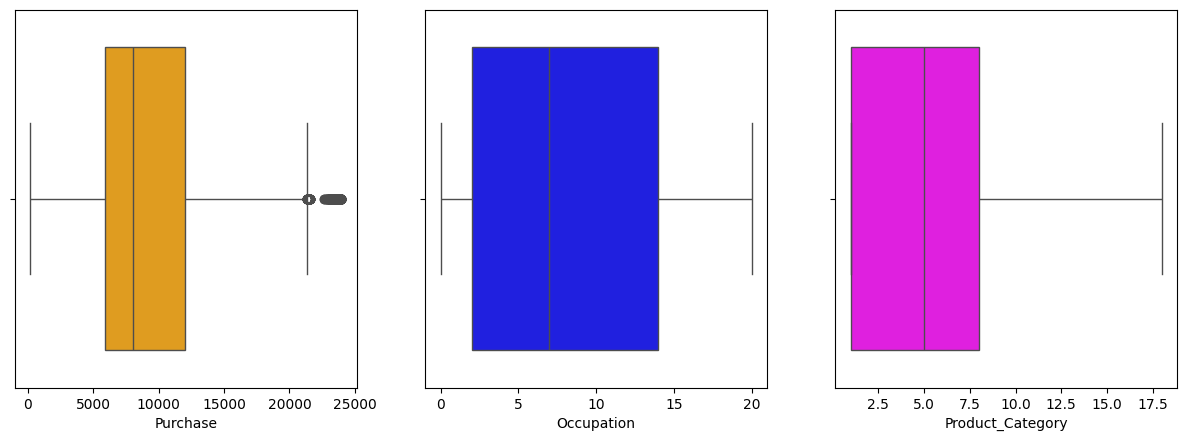

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15,2))
fig.subplots_adjust(top=2)
sns.boxplot(data=df, x='Purchase', ax=axis[0],color = "orange")
sns.boxplot(data=df, x='Occupation', ax=axis[1],color = "blue")
sns.boxplot(data=df, x='Product_Category', ax=axis[2],color = "magenta")
plt.show()

# Insights:
**<font color='736C06'>1) Purchases have outliers.</font>**

**<font color='736C06'>2) The occupation and  product categories does not have any outliers.</font>**


# Using pie chart:

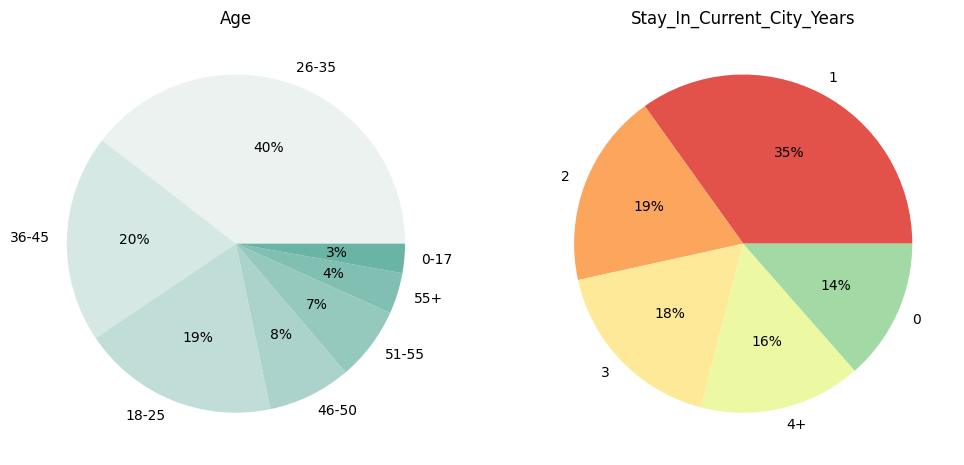

In [ ]:
unique_colors_age = sns.color_palette("light:#5A9", len(df['Age'].unique()))
unique_colors_city_years = sns.color_palette("Spectral", len(df['Stay_In_Current_City_Years'].unique()))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
data_age = df['Age'].value_counts(normalize=True) * 100
axs[0].pie(x=data_age.values, labels=data_age.index, autopct='%.0f%%', colors=unique_colors_age)
axs[0].set_title("Age")
data_city_years = df['Stay_In_Current_City_Years'].value_counts(normalize=True) * 100
axs[1].pie(x=data_city_years.values, labels=data_city_years.index, autopct='%.0f%%', colors=unique_colors_city_years)
axs[1].set_title("Stay_In_Current_City_Years")
plt.show()

#Insights

1)Customers of age group 26–35 are of 40%, Customers of age group 36–45 are 20%, Customers
of age group 18–25 are of 18%, Customers of age group 46–50 are of 8%,
Customers of age group 51–55 are 7%, Customers of age group of 55+ are 4%, and very low Customers of age group 0–17 are 2%.

2) 35% of Customers stay in a city for 1 year, 19% stay in a city for 2 years, 17% stay in a city for 3 years,
and 15% stay in a city for 4+ years.

#Bivariate Analysis:

Analyzing the variation in purchases with the following,
1. Gender vs Purchase
2. Martial_Status vs Purchase
3. Age vs Purchase
4. City_Category vs Purchase

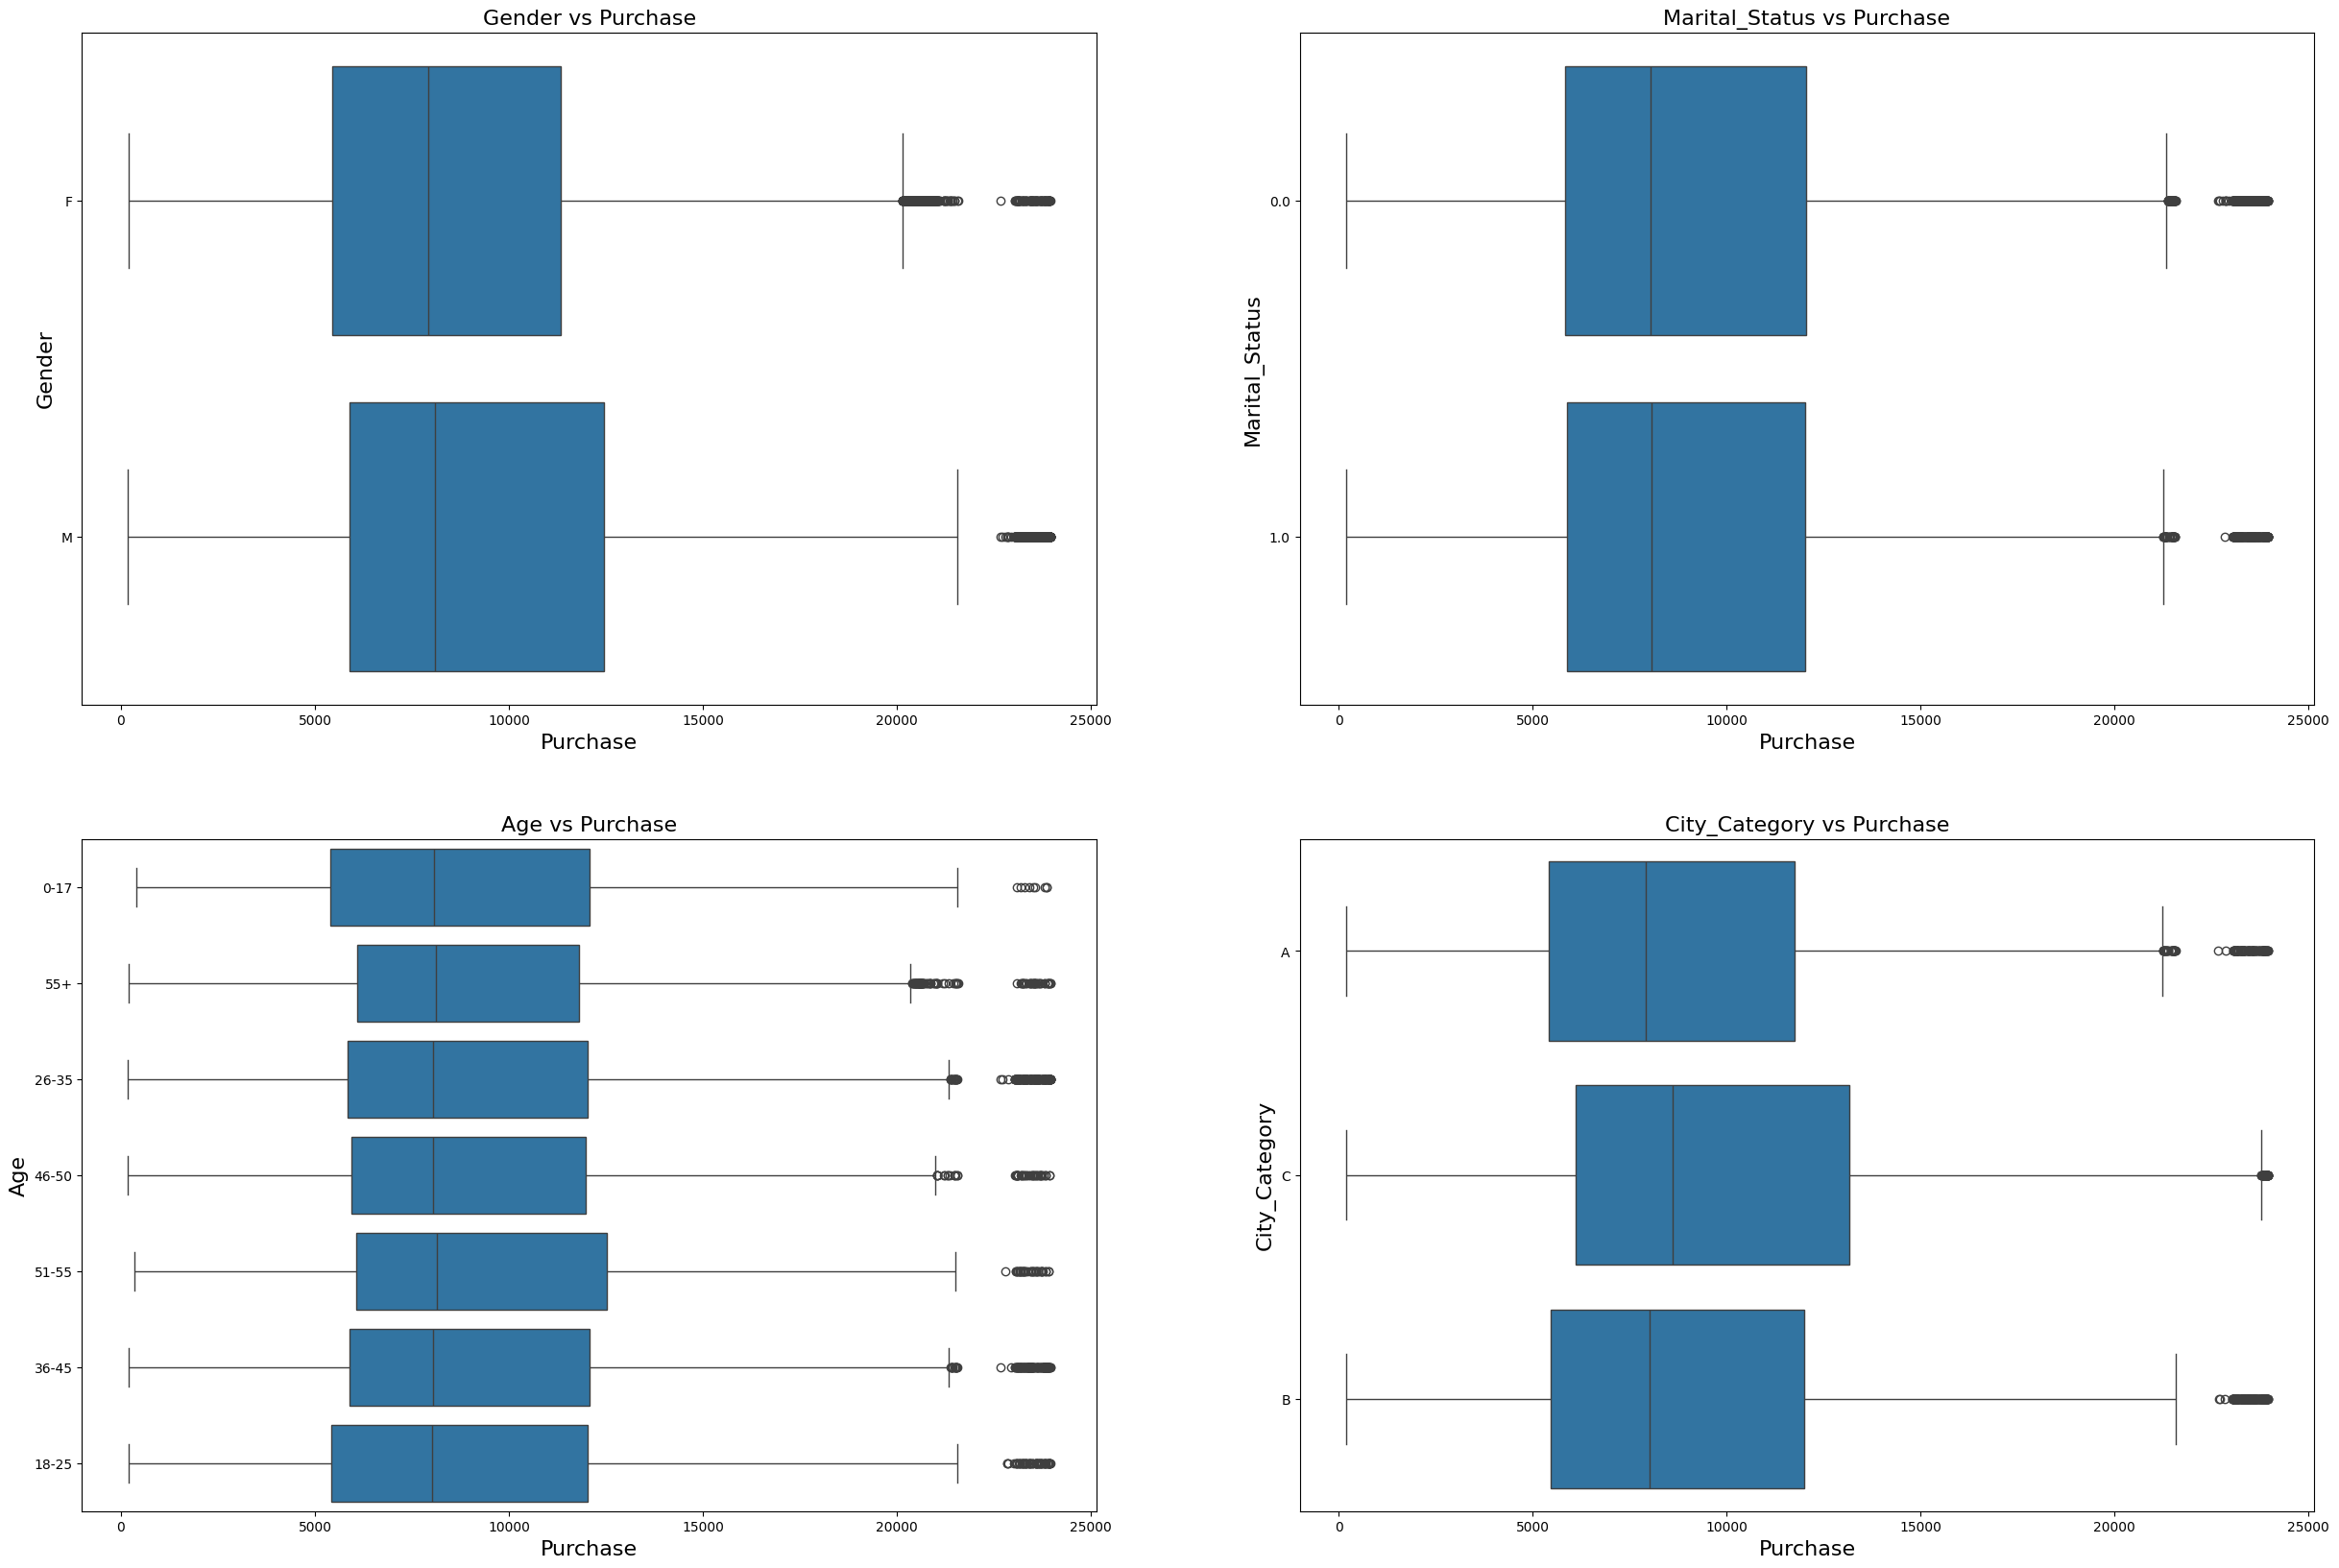

In [ ]:
fig1, axs=plt.subplots(nrows=2,ncols=2, figsize=(30,20))

sns.boxplot(data=df, y='Gender',x ='Purchase',orient='h',ax=axs[0,0])
axs[0,0].set_title("Gender vs Purchase", fontsize=16)
axs[0,0].set_xlabel("Purchase", fontsize=16)
axs[0,0].set_ylabel("Gender", fontsize=16)
sns.boxplot(data=df, y='Marital_Status',x ='Purchase',orient='h',ax=axs[0,1])
axs[0,1].set_title("Marital_Status vs Purchase", fontsize=16)
axs[0,1].set_xlabel("Purchase", fontsize=16)
axs[0,1].set_ylabel("Marital_Status", fontsize=16)
sns.boxplot(data=df, y='Age',x ='Purchase',orient='h',ax=axs[1,0])
axs[1,0].set_title("Age vs Purchase", fontsize=16)
axs[1,0].set_xlabel("Purchase", fontsize=16)
axs[1,0].set_ylabel("Age", fontsize=16)
sns.boxplot(data=df, y='City_Category',x ='Purchase',orient='h',ax=axs[1,1])
axs[1,1].set_title("City_Category vs Purchase", fontsize=16)
axs[1,1].set_xlabel("Purchase", fontsize=16)
axs[1,1].set_ylabel("City_Category", fontsize=16)
plt.show()

# Insight
1) Gender vs. Purchase

    a) The median for males and females is almost equal.

    b) Females have more outliers compared to males.

    c) Males purchased more compared to females.

2) Martial Status vs. Purchase

    a) The median for married and single people is almost equal.

    b) Outliers are present in both records.

3) Age vs. Purchase

    a) The median for all age groups is almost equal.

    b) Outliers are present in all age groups.

4) City Category vs. Purchase

    a) The C city region has very low outliers compared to other cities.

    b) A and B city region medians are almost the same.

# Using pandas quantile funtion detecting number of outliers from purchase

In [ ]:
q1 = df["Purchase"].quantile(0.25)
q3 = df["Purchase"].quantile(0.75)
IQR = q3-q1
outliers = df["Purchase"][((df["Purchase"]<(q1-1.5*IQR)) | (df["Purchase"]>(q3+1.5*IQR)))]
print("number of outliers: "+ str(len(outliers)))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 516
max outlier value:23961.0
min outlier value: 21317.0


# Are women spending more money per transaction than men? Why or Why not?

In [ ]:
avg_by_gender = df.groupby('Gender')['Purchase'].mean()
print(f'Average purchase of male and female : \n{avg_by_gender}')

Average purchase of male and female : 
Gender
F    8752.243320
M    9474.479956
Name: Purchase, dtype: float64


In [ ]:
agg_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].agg({'Purchase': ['sum', 'mean']})
agg_df = agg_df.reset_index()
agg_df = agg_df.sort_values(by='User_ID', ascending=False)
print(f"Top 10 purchase from male and female\n{agg_df.head(10)}")

Top 10 purchase from male and female
      User_ID Gender  Purchase              
                           sum          mean
5797  1006040      M  209234.0   9097.130435
5796  1006039      F   96782.0   8065.166667
5795  1006037      F  200648.0  10032.400000
5794  1006036      F  490449.0   7320.134328
5793  1006035      F   85821.0   7151.750000
5792  1006034      M   42886.0  14295.333333
5791  1006033      M  100640.0  16773.333333
5790  1006032      M   27517.0   6879.250000
5789  1006031      F   75067.0   9383.375000
5788  1006030      M  123264.0  13696.000000


In [ ]:
Gender_wise_count=agg_df['Gender'].value_counts()
print(f'Each gender wise count : \n{Gender_wise_count}')

Each gender wise count : 
Gender
M    4171
F    1627
Name: count, dtype: int64


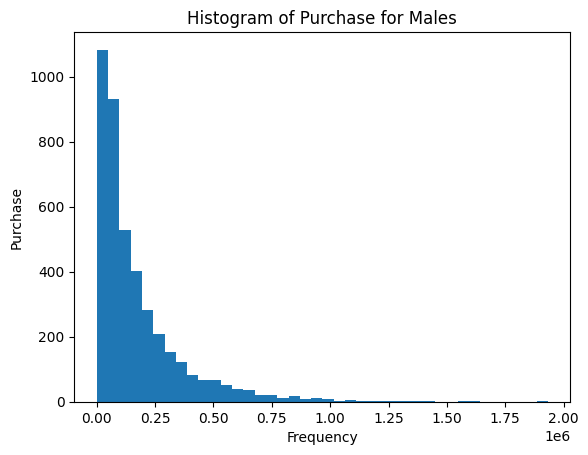

Text(0.5, 1.0, 'Histogram')

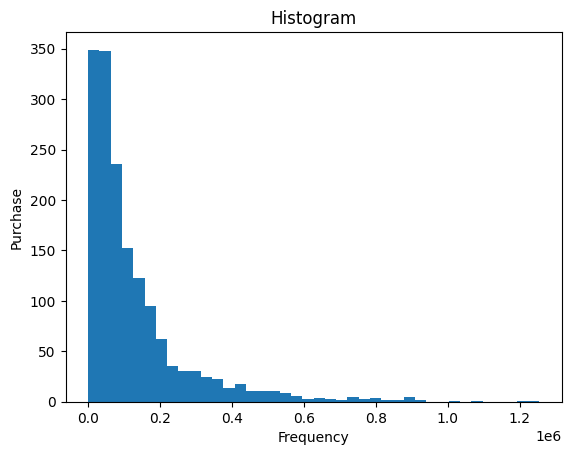

In [ ]:
sum_by_gender = df.groupby(['User_ID', 'Gender'])['Purchase'].sum()

sum_by_gender = sum_by_gender.reset_index()
sum_by_gender = sum_by_gender.sort_values(by='User_ID', ascending=False)
# MALE data representation through a histogram
male_data = sum_by_gender[sum_by_gender['Gender']=='M']['Purchase']
plt.hist(male_data, bins=40)
plt.ylabel('Purchase')
plt.xlabel('Frequency')
plt.title('Histogram of Purchase for Males')
plt.show()
# FEMALE data representation through a histogram
Female_data = sum_by_gender[sum_by_gender['Gender']=='F']['Purchase']
plt.hist(Female_data, bins=40)
plt.ylabel('Purchase')
plt.xlabel('Frequency')
plt.title('Histogram')

In [ ]:
Mean_by_gender = df.groupby(['User_ID', 'Gender'])['Purchase'].sum()
Mean_by_gender = Mean_by_gender.reset_index()
Mean_by_gender = Mean_by_gender.sort_values(by='User_ID', ascending=False)
Male_cust_avg = Mean_by_gender[Mean_by_gender['Gender']=='M']['Purchase'].mean()
Female_cust_avg = Mean_by_gender[Mean_by_gender['Gender']=='F']['Purchase'].mean()
print(f'Male customer average spent amount: {Male_cust_avg}')
print(f'Female customer average spent amount: {Female_cust_avg}')

Male customer average spent amount: 171860.38815631744
Female customer average spent amount: 131875.38106945297


# Insights
1) Male customers spend more money than female customers.

2) The highest purchase has been made from this user id: `1006040`, and the gender is male.

3) Most of the females also purchase, but they don't spend a lot more.

# Confidence intervals and distribution of the mean of the expenses by female and male customers.

Population mean: random male samples mean purchase value: 171868.304
Population mean: random Female samples mean purchase value : 130122.228
Sample means of Male purchase : 171860.39
Sample STD of Male purchase : 192105.85
Sample means of Female purchase : 131875.38
Sample STD of Female purchase : 157058.72


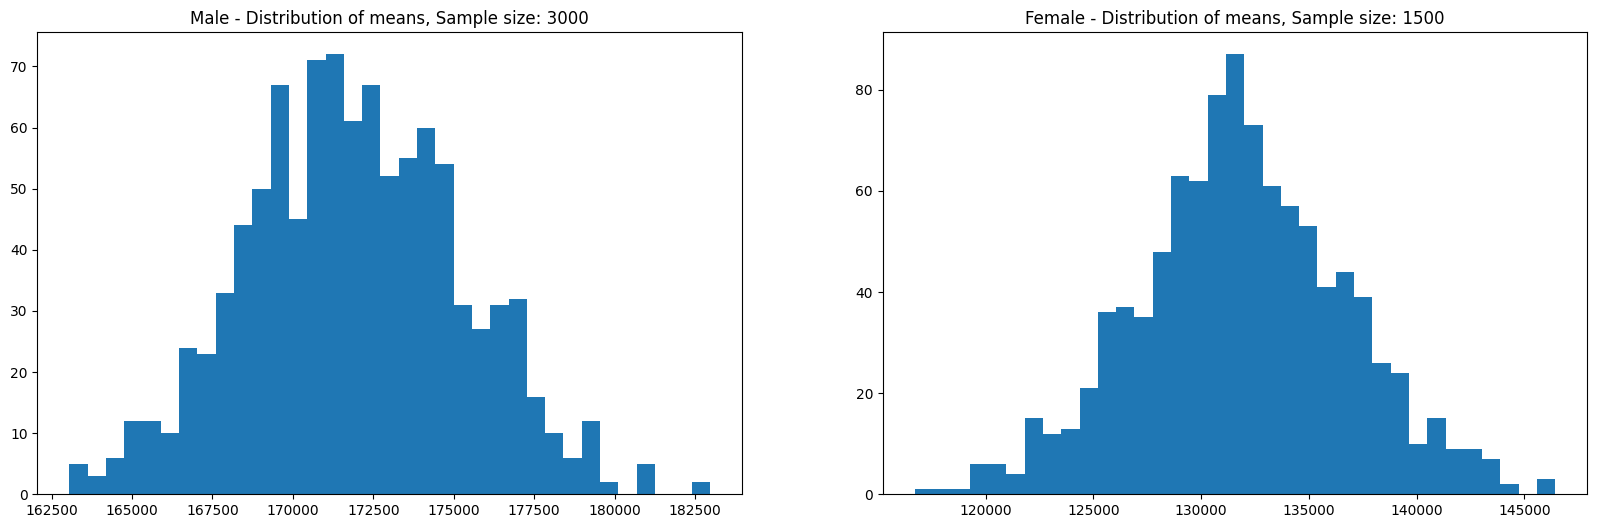

In [ ]:
# filtering gender wise dataframe

male_df = sum_by_gender[sum_by_gender['Gender']=='M']
female_df = sum_by_gender[sum_by_gender['Gender']=='F']
# Taking random sample size from dataframe
male_sample_size = 3000
female_sample_size = 1000
num_repitions = 1000
# Taking random sample from male and female dataframe
random_sample_male = male_df.sample(n=male_sample_size)
random_sample_female = female_df.sample(n=female_sample_size)
# Taking mean value from random sample male and female dataframe
male_means = random_sample_male['Purchase'].mean()
print(f'Population mean: random male samples mean purchase value: {male_means}')
female_means = random_sample_female['Purchase'].mean()
print(f'Population mean: random Female samples mean purchase value : {female_means}')
# Taking sample mean from filtered male dataframe
Male_sample_mean = round(male_df['Purchase'].mean(),2)
print(f'Sample means of Male purchase : {Male_sample_mean}')
Male_std_value = round(male_df['Purchase'].std(),2)
print(f'Sample STD of Male purchase : {Male_std_value}')
# Taking sample mean from filtered female dataframe
Female_sample_mean = round(female_df['Purchase'].mean(),2)
print(f'Sample means of Female purchase : {Female_sample_mean}')
Female_std_value = round(female_df['Purchase'].std(),2)
print(f'Sample STD of Female purchase : {Female_std_value}')
# taking blank list to creat histogram
male_means1 = []
female_means1 = []
# using for loop to create again mean value for histogram
for _ in range(num_repitions):
  male_mean2 = male_df.sample(male_sample_size,replace=True)['Purchase'].mean()
  female_mean2 = female_df.sample(female_sample_size,replace=True)['Purchase'].mean()
  male_means1.append(male_mean2)
  female_means1.append(female_mean2)
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means1, bins=35)
axis[1].hist(female_means1, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")
plt.show()

# Insights
1) The average amount spent by male customers is 925344.4.

2) The average amount spent by female customers is 712024.39.

In [ ]:
# Are confidence intervals of average male and female spending overlapping? How can company leverage this conclusion to make changes or improvements?

In [ ]:
#sample size
sample_size = 3000
# Confidence level ( 95% confidence interval)
confidence_level = 0.95
# Calculate the margin of error using the z-distribution for male
z_critical = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * (Male_std_value / np.sqrt(sample_size))
# Calculate the margin of error using the z-distribution for female
z_critical = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * (Female_std_value / np.sqrt(sample_size))

Confidence Interval 95% Male: (166240.21915912576, 177480.56084087427)


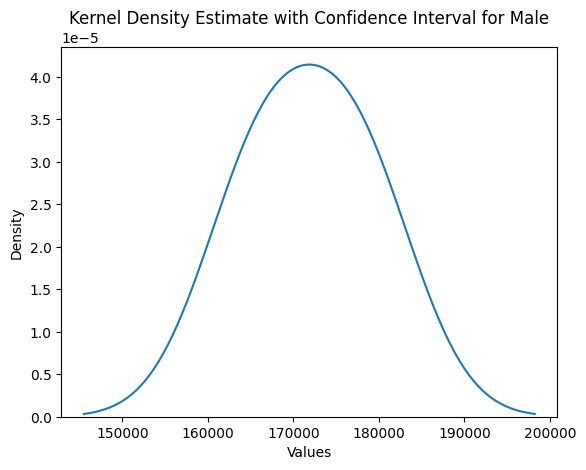

In [ ]:
# Calculate the confidence interval for male and presenting it on the graph
Male_confidence_interval = (Male_sample_mean - margin_of_error, Male_sample_mean + margin_of_error)
print("Confidence Interval 95% Male:", Male_confidence_interval)
sns.kdeplot(Male_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Male')
plt.show()

Confidence Interval 95% Female: (126255.20915912575, 137495.55084087426)


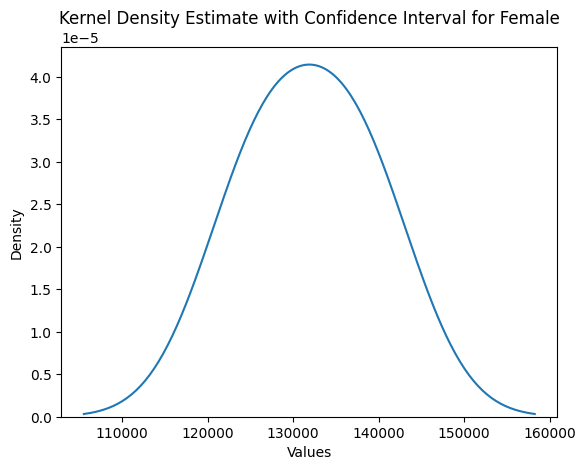

In [ ]:
# Calculate the confidence interval for female and presenting it on the graph
Female_confidence_interval = (Female_sample_mean - margin_of_error, Female_sample_mean + margin_of_error)
print("Confidence Interval 95% Female:", Female_confidence_interval)
sns.kdeplot(Female_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Female')
plt.show()

# Insights
1) With reference to the above data, at a 95% confidence interval:

    a) The average amount spent by male customers will lie between 896453.54 and 954235.25.

    b) The average amount spent by female customers will lie between 683133.53 and 740915.24.
    
2) Confidence intervals for average male and female spending are not overlapping.

3) With respect to the above data, company should target more male customers, as they spend a lot compared to
females.

# Results when the same activity is performed for Married vs Unmarried

In [ ]:
sum_by_Marital_Status = df.groupby(['User_ID', 'Marital_Status'])['Purchase'].sum()
sum_by_Marital_Status = sum_by_Marital_Status.reset_index()
sum_by_Marital_Status = sum_by_Marital_Status.sort_values(by='User_ID', ascending=False)
Married_cust_avg = sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']==1]['Purchase'].mean()
print(f'Married customer average spent amount: {Married_cust_avg}')

Married customer average spent amount: 156529.45544147844


In [ ]:
sum_by_Marital_Status = df.groupby(['User_ID', 'Marital_Status'])['Purchase'].sum()
sum_by_Marital_Status = sum_by_Marital_Status.reset_index()
sum_by_Marital_Status = sum_by_Marital_Status.sort_values(by='User_ID', ascending=False)
Unmarried_cust_avg = sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']==0]['Purchase'].mean()
print(f'Unmarried customer average spent amount: {Unmarried_cust_avg}')

Unmarried customer average spent amount: 163616.32471008028


Population mean: random Unmarried samples mean purchase value: 162380.379
Population mean: random Married samples mean purchase value : 156417.021
Sample means of Unmarried purchase : 163616.32
Sample STD of Unmarried purchase : 185654.14
Sample means of Married purchase : 156529.46
Sample STD of Married purchase : 181206.63


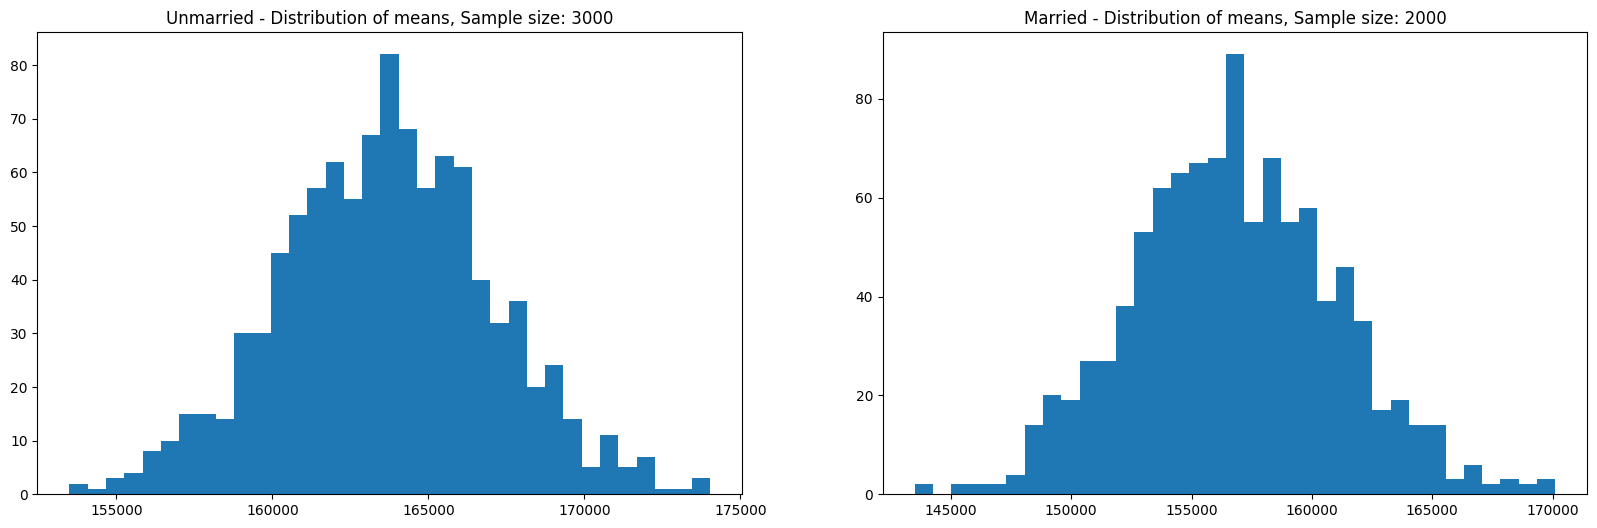

In [ ]:
# filtering Marital Status wise dataframe

Unmarried_df = sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']==0]
Married_df = sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']==1]
# Taking random sample size from dataframe
Unmarried_sample_size = 3000
Married_sample_size = 2000
num_repitions = 1000
# Taking random sample from unmarried and married dataframe
random_sample_Unmarried = Unmarried_df.sample(n=Unmarried_sample_size)
random_sample_Married = Married_df.sample(n=Married_sample_size)
# Taking mean value from random sample unmarried and married dataframe
Unmarried_means = random_sample_Unmarried['Purchase'].mean()
print(f'Population mean: random Unmarried samples mean purchase value: {Unmarried_means}')
Married_means = random_sample_Married['Purchase'].mean()
print(f'Population mean: random Married samples mean purchase value : {Married_means}')
# Taking sample mean from filtered unmarried dataframe
Unmarried_sample_mean = round(Unmarried_df['Purchase'].mean(),2)
print(f'Sample means of Unmarried purchase : {Unmarried_sample_mean}')
Unmarried_std_value = round(Unmarried_df['Purchase'].std(),2)
print(f'Sample STD of Unmarried purchase : {Unmarried_std_value}')
# Taking sample mean from filtered Married dataframe
Married_sample_mean = round(Married_df['Purchase'].mean(),2)
print(f'Sample means of Married purchase : {Married_sample_mean}')
Married_std_value = round(Married_df['Purchase'].std(),2)
print(f'Sample STD of Married purchase : {Married_std_value}')
# taking blank list to creat histogram
Unmarried_means1 = []
Married_means1 = []
# using for loop to create again mean value for histogram
for _ in range(num_repitions):
  Unmarried_mean2 = Unmarried_df.sample(Unmarried_sample_size,replace=True)['Purchase'].mean()
  Married_mean2 = Married_df.sample(Married_sample_size,replace=True)['Purchase'].mean()
  Unmarried_means1.append(Unmarried_mean2)
  Married_means1.append(Married_mean2)
# # making histogram to check visually distribution mean for Unmarried and Married
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(Unmarried_means1, bins=35)
axis[1].hist(Married_means1, bins=35)
axis[0].set_title("Unmarried - Distribution of means, Sample size: 3000")
axis[1].set_title("Married - Distribution of means, Sample size: 2000")
plt.show()

# Insights
1) Unmarried customer average sent amount: 880575.7819724905

2) Married customer average sent amount: 843526.7966855295

3) Unmarried customers spend more than married customers.

In [ ]:
#sample size
sample_size = 3000
# Confidence level ( 95% confidence interval)
confidence_level = 0.95
# Calculate the margin of error using the z-distribution for male
z_critical = stats.norm.ppf((1 + confidence_level) / 2) # Z-score for the desired confidence level
margin_of_error = z_critical * (Unmarried_std_value / np.sqrt(sample_size))
# Calculate the margin of error using the z-distribution for female
z_critical = stats.norm.ppf((1 + confidence_level) / 2) # Z-score for the desired confidence level
margin_of_error = z_critical * (Married_std_value / np.sqrt(sample_size))

Confidence Interval 95% Unmarried: (157132.04317602556, 170100.59682397445)


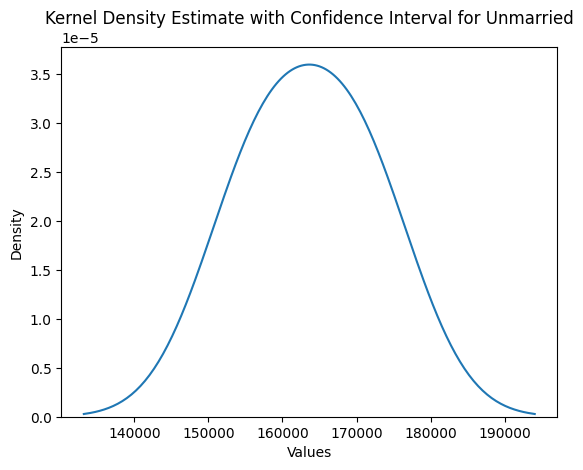

In [ ]:
# Calculate the confidence interval for Unmarried and presenting it on the graph
Unmarried_confidence_interval = (Unmarried_sample_mean - margin_of_error, Unmarried_sample_mean + margin_of_error)
print("Confidence Interval 95% Unmarried:", Unmarried_confidence_interval)
sns.kdeplot(Unmarried_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Unmarried')
plt.show()

Confidence Interval 95% Married: (150045.18317602554, 163013.73682397444)


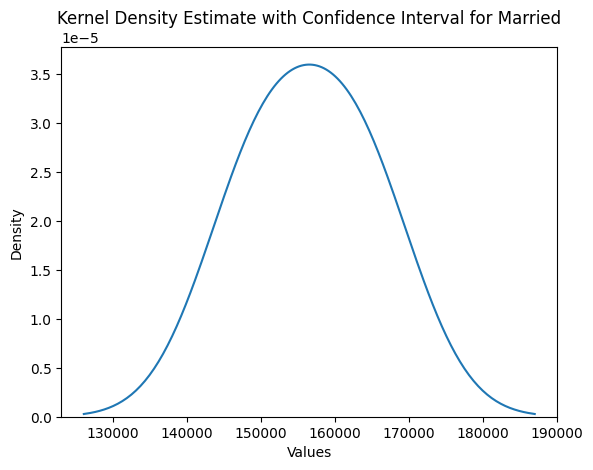

In [ ]:
# Calculate the confidence interval for female and presenting it on the graph
Married_confidence_interval = (Married_sample_mean - margin_of_error, Married_sample_mean + margin_of_error)
print("Confidence Interval 95% Married:", Married_confidence_interval)
sns.kdeplot(Married_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Married')
plt.show()

# Insight
1) With reference to the above data, at a 95% confidence interval:
    a) The average amount spent by an unmarried customer will lie between 847105.2492916514 and 914046.3107083486.
    b) The average amount spent by a married customer will lie between 810056.2692916514 and 876997.3307083487.

2) Confidence intervals for average unmarried and married spending are overlapping.

3) With respect to the above data, company should target more unmarried customers,as they spend a lot compared to married customers.

**Results when the same activity is performed for Age**

In [ ]:
def calculate_age_group_means_and_confidence_intervals(df):
  sum_by_age = df.groupby(['User_ID', 'Age'])['Purchase'].sum().reset_index()
  sum_by_age = sum_by_age.sort_values(by='User_ID', ascending=False)
  # Create dict and filtering data age group wise
  age_groups = {
  'Age_0_17': sum_by_age[sum_by_age['Age'] == '0-17'],
  'Age_18_25': sum_by_age[sum_by_age['Age'] == '18-25'],
  'Age_26_35': sum_by_age[sum_by_age['Age'] == '26-35'],
  'Age_36_45': sum_by_age[sum_by_age['Age'] == '36-45'],
  'Age_46_50': sum_by_age[sum_by_age['Age'] == '46-50'],
  'Age_51_55': sum_by_age[sum_by_age['Age'] == '51-55'],
  'Age_55+': sum_by_age[sum_by_age['Age'] == '55+']
  }
  # Define sample sizes and number of repetitions
  sample_sizes = {
  'Age_0_17': 200,
  'Age_18_25': 1000,
  'Age_26_35': 2000,
  'Age_36_45': 1000,
  'Age_46_50': 500,
  'Age_51_55': 400,
  'Age_55+': 300
  }
  num_repitions = 1000
  # Create a dictionary to store results
  results = {}
  # Perform random sampling and calculate means for each age group
  for age_group, age_df in age_groups.items():
    sample_size = sample_sizes.get(age_group, 0)
    sample_means = []
    for _ in range(num_repitions):
      random_sample = age_df.sample(n=sample_size)
      sample_mean = random_sample['Purchase'].mean()
      sample_means.append(sample_mean)
    # Calculate the population mean, sample mean, and standard deviation
    population_mean = age_df['Purchase'].mean()
    sample_mean_mean = sum(sample_means) / len(sample_means)
    sample_mean_std = pd.Series(sample_means).std()
    # Calculate the confidence interval using the z-distribution
    confidence_level = 0.95 # 95% confidence interval
    z_critical = stats.norm.ppf((1 + confidence_level) / 2) # Z-score for the desired confidence level
    margin_of_error = z_critical * (age_df['Purchase'].std() / np.sqrt(sample_size))
    lower_bound = sample_mean_mean - margin_of_error
    upper_bound = sample_mean_mean + margin_of_error
    results[age_group] = {
    'Population Mean': population_mean,
    'Sample Mean Mean': sample_mean_mean,
    'Sample Mean Std': sample_mean_std,
    'Confidence Interval': (lower_bound, upper_bound)
    }
  return results
results = calculate_age_group_means_and_confidence_intervals(df)
for age_group, metrics in results.items():
  print(f'{age_group} average spent value, random mean value, std value and Confidence Interval:')
  print(f'{age_group} customer average spent amount: {metrics["Population Mean"]}')
  print(f'Random Sample Mean : {metrics["Sample Mean Mean"]}')
  print(f'Sample Mean Std: {metrics["Sample Mean Std"]}')
  print(f'Confidence Interval: {metrics["Confidence Interval"]}')
  print()

Age_0_17 average spent value, random mean value, std value and Confidence Interval:
Age_0_17 customer average spent amount: 118047.17972350231
Random Sample Mean : 118232.72530500023
Sample Mean Std: 2697.008339991038
Confidence Interval: (99727.00308892425, 136738.44752107622)

Age_18_25 average spent value, random mean value, std value and Confidence Interval:
Age_18_25 customer average spent amount: 165611.4364851958
Random Sample Mean : 165661.40842100003
Sample Mean Std: 1242.7299991735965
Confidence Interval: (154201.69639102838, 177121.12045097168)

Age_26_35 average spent value, random mean value, std value and Confidence Interval:
Age_26_35 customer average spent amount: 181151.6487684729
Random Sample Mean : 181123.40625300017
Sample Mean Std: 541.4629332804348
Confidence Interval: (172390.1435484776, 189856.66895752275)

Age_36_45 average spent value, random mean value, std value and Confidence Interval:
Age_36_45 customer average spent amount: 162324.13850174216
Random Samp

# Insights
1) With reference to the above data, at a 95% confidence interval:

    a) The highest average amount spent by 26- to 35-year-old customers will lie between 944419.9990 and 1034842.9516.

    b) The average amount spent by 36- to 45-year-old customers will lie between 819003.0902 and 940678.8198.

    c) The average amount spent by 18- to 25-year-old customers will lie between 799594.4375 and 909664.7362.

    d) The average amount spent by 46- to 50-year-old customers will lie between 711215.1004 and 874125.3830.

    e) The average amount spent by 51- to 55-year-old customers will lie between 685670.0292 and 840962.3353.

    f) The average amount spent by 55+ age group customers will lie between 470454.5225 and 610200.5797.

    g) The lowest average amount spent by 0 to 17-year-old customers will lie between 524534.4423 and 714973.3156.

2) From the above data, it is clear that the age group 26 to 35 spends more compared to other age categories.

3) Age groups above 55 and below 0 to 17 spend very little compared to others.

4) Confidence intervals for average 26- to 35-year-old and 36- to 45-year-old spending are not overlapping.

5) With respect to the above data, the company should target the age category between 26 and 35, as they spend more
money compared to others.

#Recommendations

1) Men spend more money than women, so the company should focus on retaining male customers and getting more male
customers.

2) Product Category: 5, 1, and 8 have the highest purchasing frequency.
It means the products in these categories are liked more by customers.
The company can focus on selling more of these products.

3) Product Category: 11, 2, and 6, 3 have almost close competition in purchasing.The company can focus on selling more of these products.

4) Unmarried customers spend more money compared to married customers. So the company should focus on retaining the
unmarried customers and getting more unmarried customers.

5) 86% of purchases are done by customers whose ages are between 18 and 45. So the company should focus on the
acquisition of customers who are aged 18–45.

6) Customers living in City_Category C spend more money than other customers living in B or A. Selling more
products in City Category C will help the company increase sales.


